##**Quiz 4** – Logistic Regression
**Author:** Ahmed Ali  
**Date:** June 16, 2025  

## **Part A: Introduction**

The **Boston HMDA (Home Mortgage Disclosure Act)** dataset includes data on **2,381** mortgage applications collected by the Federal Reserve Bank of Boston. Each record contains various financial and demographic features of the applicant, including income ratios, credit scores, employment status, and race, along with a final decision on whether the mortgage was **denied or approved**.

The primary goal of this project is to build **binary logistic regression models** that predict whether a mortgage application is likely to be **denied** (`deny = 1`) or **approved** (`deny = 0`). The output of these models can help regulators detect patterns or potential bias in loan approval decisions.

---

### Steps in This Project:
1. **Load** the cleaned dataset and review its structure.
2. Perform **Exploratory Data Analysis (EDA)** to understand distributions, detect patterns, and find missing values.
3. Carry out **Data Preparation** by fixing missing values, encoding categorical variables, and renaming any incorrect column headers.
4. Conduct a **Prepped Data Review** to confirm the dataset is clean and ready for modeling.
5. Build and compare **multiple logistic regression models** using different feature selection strategies.
6. **Evaluate and select** the best model using cross-validation and performance metrics.
7. Provide **conclusions** about model behavior and future improvements.

This structured approach ensures that the final model is both accurate and interpretable, while fulfilling the project’s overall goal.

---


## **Part B: Exploratory Data Analysis (EDA)**

In this section, we analyze the structure and contents of the HMDA dataset. Our goals are to:
- Understand variable types (numerical or categorical)
- Detect missing values or anomalies
- Examine the distribution of each feature
- Explore the relationship between individual features and the target variable `deny`

These insights will help guide our cleaning and model preparation steps.


1.   List item
2.   List item



### **1.Importing and Loading the Data**

SETUP AND IMPORTS


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score

In [3]:
url = "https://raw.githubusercontent.com/AhmedKamal-41/Quiz-4/refs/heads/main/HDMA%20Boston%20Housing%20Data.csv"

# Fix the extra index column issue
df = pd.read_csv(url)

# Display the first 5 rows
df.head()


,Unnamed: 0,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,comdominiom,black,deny
0,1,0.221,0.221,0.800000,5.0,2.0,no,no,no,no,3.9,0,no,no
1,2,0.265,0.265,0.921875,2.0,2.0,no,no,no,yes,3.2,0,no,no
2,3,0.372,0.248,0.920398,1.0,2.0,no,no,no,no,3.2,0,no,no
3,4,0.320,0.250,0.860465,1.0,2.0,no,no,no,no,4.3,0,no,no
4,5,0.360,0.350,0.600000,1.0,1.0,no,no,no,no,3.2,0,no,no


We load the cleaned dataset and confirm that it has **2,381** rows and **14** columns. The `.head()` function shows the first few rows, helping us confirm that the data was loaded correctly and has the expected structure.


### Variable Descriptions

| Variable       | Meaning                                                                 |
|----------------|-------------------------------------------------------------------------|
| `dir`          | Debt-to-income ratio — how much of the person’s income goes toward debt payments. Higher values mean more debt. |
| `hir`          | Housing-to-income ratio — how much of their income is spent on housing. High values may mean the applicant can't afford a loan. |
| `lvr`          | Loan-to-value ratio — the size of the loan compared to the property’s value. A higher ratio means a riskier loan. |
| `ccs`          | Consumer credit score (1 = best, 6 = worst) — how good their credit is for general borrowing. |
| `mcs`          | Mortgage credit score (1 = best, 4 = worst) — a score just for mortgage-related credit risk. |
| `pbcr`         | Public bad credit record — does the person have a known bad credit history? (1 = yes, 0 = no) |
| `dmi`          | Denied mortgage insurance — was the person denied insurance that protects the lender? (1 = yes, 0 = no) |
| `self`         | Self-employed — is the person working for themselves? (1 = yes, 0 = no) |
| `single`       | Single — is the person not married? (1 = yes, 0 = no) |
| `uria`         | Industry unemployment rate — how high unemployment was in the person’s industry (in Massachusetts, 1989) |
| `condominium`  | Is the property a condo unit? (1 = yes, 0 = no) |
| `black`        | Is the applicant Black? (1 = yes, 0 = no) |
| `deny`         | Target variable — was the mortgage application denied? (1 = yes, 0 = no) |


In [4]:
# Rename all columns for clarity
df.rename(columns={
    'dir': 'debt_to_income_ratio',
    'hir': 'housing_to_income_ratio',
    'lvr': 'loan_to_value_ratio',
    'ccs': 'consumer_credit_score',
    'mcs': 'mortgage_credit_score',
    'pbcr': 'bad_credit_history',
    'dmi': 'denied_mortgage_insurance',
    'self': 'self_employed',
    'single': 'is_single',
    'uria': 'industry_unemployment_rate',
    'condominium': 'is_condo',
    'black': 'is_black',
    'deny': 'application_denied'
}, inplace=True)


### Rename Columns for Clarity

We renamed all columns to more descriptive names for better readability:

This makes the data easier to understand when building and interpreting models.


### **3. Basic Info**

In [5]:
# Check data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  2381 non-null   int64  
 1   debt_to_income_ratio        2381 non-null   float64
 2   housing_to_income_ratio     2381 non-null   float64
 3   loan_to_value_ratio         2381 non-null   float64
 4   consumer_credit_score       2381 non-null   float64
 5   mortgage_credit_score       2381 non-null   float64
 6   bad_credit_history          2380 non-null   object 
 7   denied_mortgage_insurance   2381 non-null   object 
 8   self_employed               2380 non-null   object 
 9   is_single                   2381 non-null   object 
 10  industry_unemployment_rate  2381 non-null   float64
 11  comdominiom                 2381 non-null   int64  
 12  is_black                    2381 non-null   object 
 13  application_denied          2381 

### Data Types and Null Values

The dataset has 2,381 rows and 13 columns.  
Only two columns — `bad_credit_history` and `self_employed` — have one missing value each.  
Categorical columns like `self_employed`, `is_black`, and `application_denied` are stored as text and need to be converted to numbers.  
The `Unnamed: 0` column is just an index from the CSV and can be dropped.  
Most other columns are already in numeric format and are ready for use.


### **4. Check for Missing Values**

In [6]:
df.isnull().sum()

,0
Unnamed: 0,0
debt_to_income_ratio,0
housing_to_income_ratio,0
loan_to_value_ratio,0
consumer_credit_score,0
mortgage_credit_score,0
bad_credit_history,1
denied_mortgage_insurance,0
self_employed,1
is_single,0


### **5. Check for Duplicates**

In [7]:
# Check for duplicate rows excluding the 'Unnamed: 0' column
df_no_index = df.drop(columns=['Unnamed: 0']) if 'Unnamed: 0' in df.columns else df
df_no_index.duplicated().sum()


np.int64(3)

we check for duplicate rows ignoring the column `Unnamed: 0` index column.  
The result shows there are **3 duplicates** in the dataset.

### **6. Descriptive Statistics**

In [8]:
# Quick statistics for numeric columns
df.describe()

,Unnamed: 0,debt_to_income_ratio,housing_to_income_ratio,loan_to_value_ratio,consumer_credit_score,mortgage_credit_score,industry_unemployment_rate,comdominiom
count,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000
mean,1191.000000,0.330814,0.255346,0.737760,2.116387,1.721008,3.774496,0.288114
std,687.479818,0.107235,0.096635,0.178715,1.666370,0.537169,2.026636,0.452980
min,1.000000,0.000000,0.000000,0.020000,1.000000,1.000000,1.800000,0.000000
25%,596.000000,0.280000,0.214000,0.652850,1.000000,1.000000,3.100000,0.000000
50%,1191.000000,0.330000,0.260000,0.779412,1.000000,2.000000,3.200000,0.000000
75%,1786.000000,0.370000,0.298800,0.868421,2.000000,2.000000,3.900000,1.000000
max,2381.000000,3.000000,3.000000,1.950000,6.000000,4.000000,10.600000,1.000000


### Summary Statistics

- Most features like `debt_to_income_ratio`, `housing_to_income_ratio`, and `loan_to_value_ratio` have values close to their average and median — they appear balanced.
- `consumer_credit_score` and `mortgage_credit_score` are score-based with only a few possible values.
- `is_condo` is a binary variable (0 or 1), indicating whether the property is a condominium.
- No unusual values stand out, but we’ll confirm this with visualizations next.


### **7. Histograms for Overall Distribution**

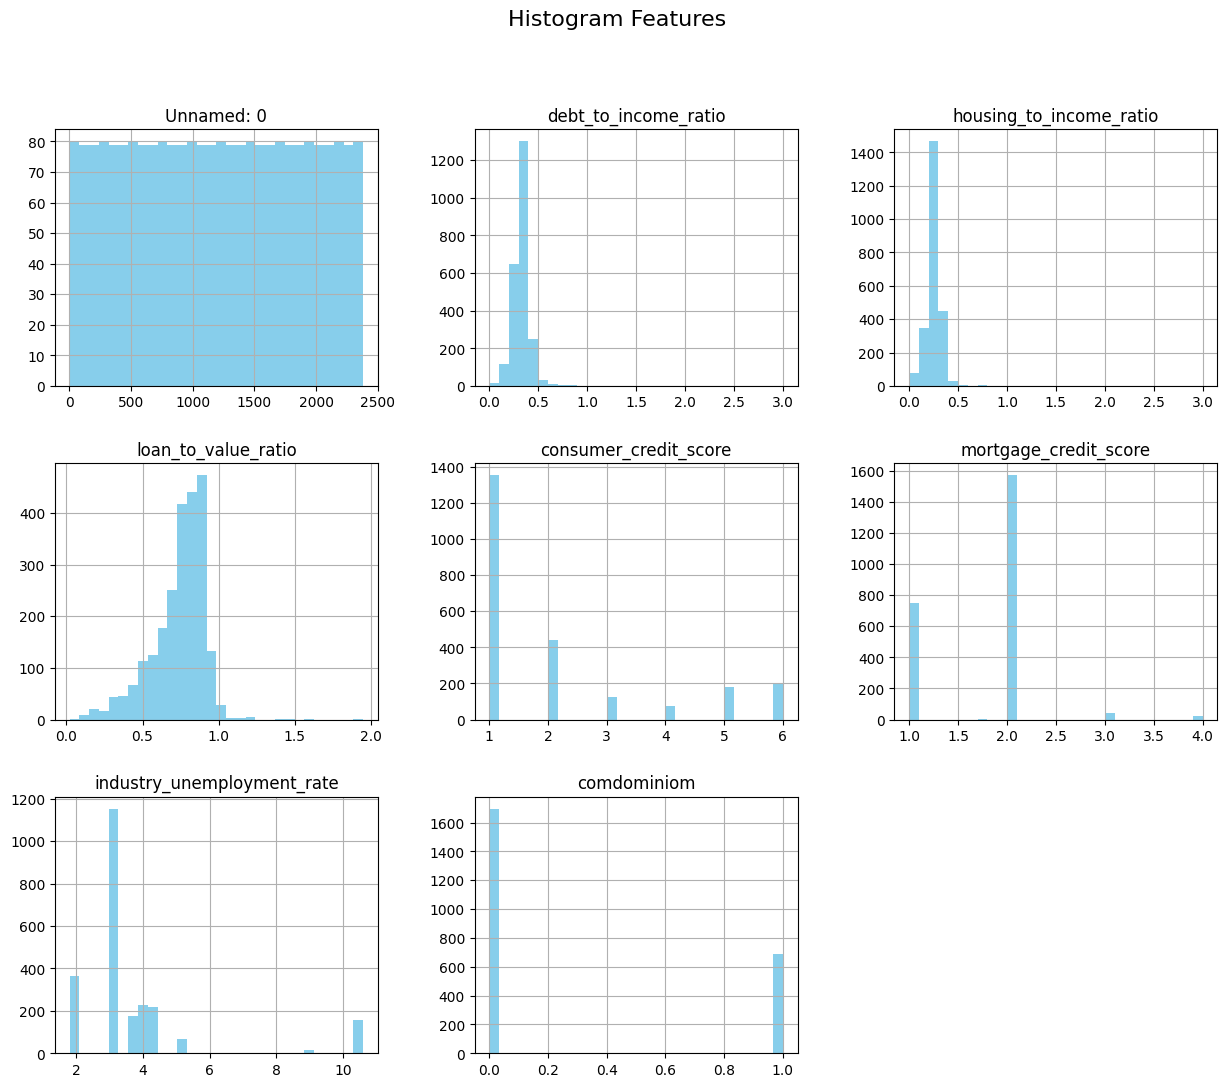

In [9]:
# Plot histograms for all numerical columns

df.hist(bins=30, figsize=(15, 12), color='skyblue')
plt.suptitle('Histogram Features', fontsize=16)
plt.show()

### Numeric Feature Distributions

- Most people have low debt (`debt_to_income_ratio`) and housing costs (`housing_to_income_ratio`) compared to income.
- Loan amounts (`loan_to_value_ratio`) are usually close to the property value.
- Credit scores (`consumer_credit_score`, `mortgage_credit_score`) are mostly good (lower values).
- Most unemployment rates (`industry_unemployment_rate`) are between 2% and 4%.
- Few applicants are buying condos (`is_condo` is mostly 0).
- The first column (`Unnamed: 0`) is just an index and not needed.

---

## **Part C: Data Preparation**

In this section, we clean and prepare the data for modeling.  
We’ll handle missing values, drop unnecessary columns, and convert categorical values into numeric format so they can be used in logistic regression.


### **1. Drop the Index Column**

In [10]:
# Drop the first index column if it exists
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)

### Removing Extra Index Column

The column `Unnamed: 0` is just a leftover index from the original CSV file.  
It doesn’t carry useful information, so we drop it from the datase. df already has its own indexing.

###**2. Fill Missing Values (mode Imputation)**

In [11]:
# Fill missing values in categorical columns with the most common value (mode)
df['bad_credit_history'].fillna(df['bad_credit_history'].mode()[0], inplace=True)
df['self_employed'].fillna(df['self_employed'].mode()[0], inplace=True)



<ipython-input-11-2032617762>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bad_credit_history'].fillna(df['bad_credit_history'].mode()[0], inplace=True)
<ipython-input-11-2032617762>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(va

### Impute Missing Categorical Values

Instead of dropping rows, we filled missing values in `bad_credit_history` and `self_employed` with their most common values.  
This keeps all data in the dataset while still handling missing entries.


### **3. Drop Duplicated Rows**

In [12]:
# Drop any duplicate rows
df.drop_duplicates(inplace=True)


### Remove Duplicate Rows

We checked earlier and found some duplicate rows in the dataset.  
Now we remove them to make sure the model isn't biased by repeated data.


### **4. Convert 'yes'/'no' to 1/0**

In [13]:
# Convert all 'yes'/'no' values to 1/0
df.replace({'yes': 1, 'no': 0}, inplace=True)

<ipython-input-13-526805731>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'yes': 1, 'no': 0}, inplace=True)


### Encode Categorical Values

We replaced all "yes" with 1 and "no" with 0 so the model can understand them as numeric inputs.


### **5. Convert Object Columns to Numeric**

In [14]:
# Convert object-type yes/no columns to integers (after renaming)
cols_to_convert = [
    'bad_credit_history', 'denied_mortgage_insurance', 'self_employed',
    'is_single', 'is_black', 'application_denied'
]
df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric)


### Final Conversion

After replacing yes/no values, we convert all remaining categorical columns to numeric types.  
This step ensures the entire dataset is in the right format for modeling.

### **Summary of Data Preparation**

- Removed the extra index column (`Unnamed: 0`)
- Filled missing values in `bad_credit_history` and `self_employed` using the most common value (mode)
- Replaced all "yes"/"no" values with 1/0
- Fixed the column name `comdominiom` to `is_condo`
- Renamed all columns to more descriptive names
- Converted all categorical columns to numeric types
- Removed any duplicate rows

Now the dataset is clean, consistent, and ready for training models.

---


## **Part D: Prepped Data Review**

Now that the dataset has been cleaned and formatted, we’ll do a quick review to make sure:

- All column names are correct
- Data types are numeric
- No missing values remain
- Categorical variables are encoded
- Distributions still make sense

This helps confirm that the dataset is fully ready for modeling.


### **1. Quick Info Check**

In [15]:
# Check info again after cleaning
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2378 entries, 0 to 2380
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   debt_to_income_ratio        2378 non-null   float64
 1   housing_to_income_ratio     2378 non-null   float64
 2   loan_to_value_ratio         2378 non-null   float64
 3   consumer_credit_score       2378 non-null   float64
 4   mortgage_credit_score       2378 non-null   float64
 5   bad_credit_history          2378 non-null   int64  
 6   denied_mortgage_insurance   2378 non-null   int64  
 7   self_employed               2378 non-null   int64  
 8   is_single                   2378 non-null   int64  
 9   industry_unemployment_rate  2378 non-null   float64
 10  comdominiom                 2378 non-null   int64  
 11  is_black                    2378 non-null   int64  
 12  application_denied          2378 non-null   int64  
dtypes: float64(6), int64(7)
memory usage: 

### Data Check After Cleaning

All columns are now properly named and in numeric format.  
There are no missing values, and all object types have been converted to numbers.


### **2. Preview Cleaned Data**

In [16]:
# Quick statistics for numeric columns
df.describe()

,debt_to_income_ratio,housing_to_income_ratio,loan_to_value_ratio,consumer_credit_score,mortgage_credit_score,bad_credit_history,denied_mortgage_insurance,self_employed,is_single,industry_unemployment_rate,comdominiom,is_black,application_denied
count,2378.000000,2378.000000,2378.000000,2378.000000,2378.000000,2378.000000,2378.000000,2378.000000,2378.000000,2378.000000,2378.000000,2378.000000,2378.000000
mean,0.330340,0.255005,0.737796,2.117374,1.721918,0.073171,0.020185,0.116064,0.393188,3.772151,0.288057,0.142557,0.118587
std,0.104948,0.095113,0.178630,1.667105,0.536896,0.260471,0.140662,0.320369,0.488561,2.022993,0.452953,0.349694,0.323370
min,0.000000,0.000000,0.020000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.800000,0.000000,0.000000,0.000000
25%,0.280000,0.214000,0.653201,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.100000,0.000000,0.000000,0.000000
50%,0.330000,0.260000,0.779536,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.200000,0.000000,0.000000,0.000000
75%,0.370000,0.297775,0.868421,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,3.900000,1.000000,0.000000,0.000000
max,3.000000,3.000000,1.950000,6.000000,4.000000,1.000000,1.000000,1.000000,1.000000,10.600000,1.000000,1.000000,1.000000


### **3. No Missing Values and No Duplicates**



In [17]:
# Final check for missing values
df.isnull().sum()


,0
debt_to_income_ratio,0
housing_to_income_ratio,0
loan_to_value_ratio,0
consumer_credit_score,0
mortgage_credit_score,0
bad_credit_history,0
denied_mortgage_insurance,0
self_employed,0
is_single,0
industry_unemployment_rate,0


In [18]:
df.duplicated().sum()

np.int64(0)

### **4. Histograms**

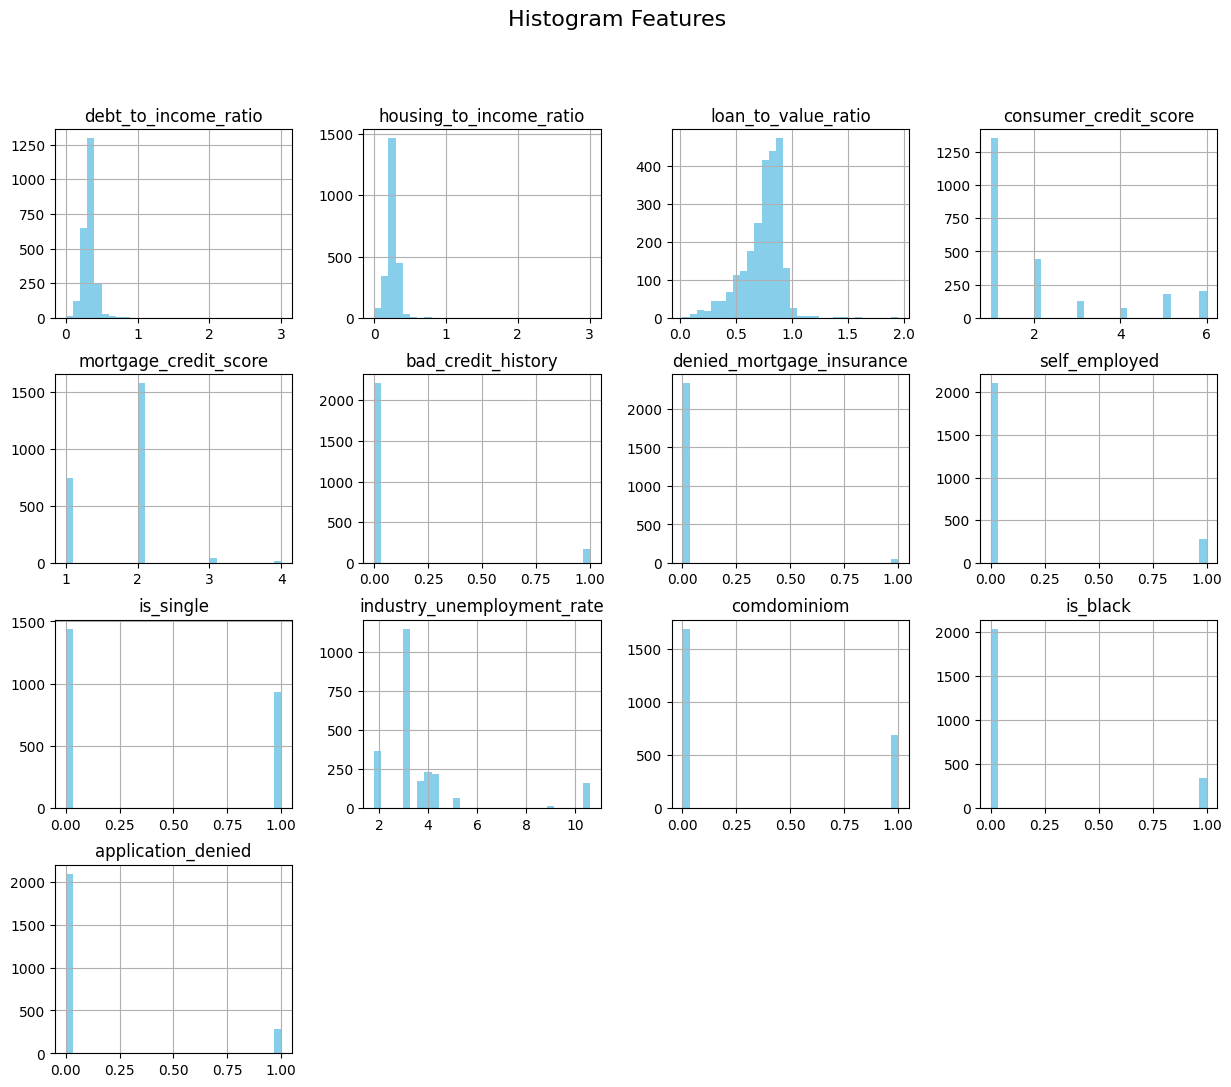

In [19]:
# Plot histograms for all numerical columns

df.hist(bins=30, figsize=(15, 12), color='skyblue')
plt.suptitle('Histogram Features', fontsize=16)
plt.show()

- All features are now numeric and clearly plotted.
- `yes`/`no` values are now correctly shown as 0/1 bars.
- No missing values or strange categories remain.
- Distributions still make sense and match what we saw before cleaning.

Everything looks correct — the data is ready for modeling.

---

##**Part E: Regression Modeling**

We build and compare three logistic regression models:

- **Model 1**: All features
- **Model 2**: Manually selected features based on domain knowledge
- **Model 3**: Top features selected using Decision Tree feature importance

We evaluate all models using **5-fold cross-validation** and F1-score.




### **1. Data Splitting (Shared Across All Models)**

We split the data into training (70%) and testing (30%) sets.  
The target is `application_denied`, and all other columns are used as input features.


In [26]:
# Step 1 – Define y (target)
y = df['application_denied']

# Step 2 – Define all feature sets
X1 = df.drop(columns=['application_denied'])  # Model 1: All features

# Model 2 – Manual feature selection
X2 = df[[
    'debt_to_income_ratio',
    'loan_to_value_ratio',
    'consumer_credit_score',
    'bad_credit_history',
    'denied_mortgage_insurance',
    'industry_unemployment_rate'
]]

# Model 3 – Top 6 features using decision tree
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X1, y)
top_tree_features = pd.Series(tree.feature_importances_, index=X1.columns).sort_values(ascending=False).head(6).index.tolist()
X3 = X1[top_tree_features]

# Step 3 – Perform consistent train-test split for each model
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=42)
X2_train, X2_test = train_test_split(X2, test_size=0.3, random_state=42)
X3_train, X3_test = train_test_split(X3, test_size=0.3, random_state=42)
X4 = X1  # All features
X4_train, X4_test, y_train, y_test = train_test_split(X4, y, test_size=0.3, random_state=42)



### Model 1 – All Features

This model uses the full dataset with all available features.  
It acts as a baseline to compare against more selective models.


In [21]:
model1 = LogisticRegression(max_iter=1000)
scores1 = cross_val_score(model1, X1, y, cv=5, scoring='f1')

model1.fit(X1_train, y_train)
y_pred1 = model1.predict(X1_test)
print("Model 1 – All Features: Avg F1 Score =", round(scores1.mean(), 3))
print("Avg F1 Score (5-fold CV):", round(scores1.mean(), 3))
print("Accuracy:", round(accuracy_score(y_test, y_pred1), 3))
print("F1 Scores across folds:", np.round(scores1, 3))


Model 1 – All Features: Avg F1 Score = 0.393
Avg F1 Score (5-fold CV): 0.393
Accuracy: 0.895
F1 Scores across folds: [0.375 0.63  0.278 0.447 0.235]


### Model 1 Evaluation

Model 1 performs well using all features. However, it may be less interpretable and could include unnecessary variables.

---

### **Model 2 – Manual Feature Selection**

This model uses six manually selected features based on domain knowledge and earlier analysis.  
It aims to keep the model simpler while maintaining good predictive power.



In [22]:
# Model 2: Logistic Regression with manually selected features
model2 = LogisticRegression(max_iter=1000)

# Cross-validation scores (F1)
scores2 = cross_val_score(model2, X2, y, cv=5, scoring='f1')

# Train on training set and predict on test set
model2.fit(X2_train, y_train)
y_pred2 = model2.predict(X2_test)

# Print results
print("Model 2 – Manual Features")
print("Avg F1 Score (5-fold CV):", round(scores2.mean(), 3))
print("Test Accuracy:", round(accuracy_score(y_test, y_pred2), 3))
print("F1 Scores across folds:", np.round(scores2, 3))


Model 2 – Manual Features
Avg F1 Score (5-fold CV): 0.388
Test Accuracy: 0.891
F1 Scores across folds: [0.333 0.615 0.333 0.421 0.235]


### Model 2 Evaluation

Model 2 is easier to explain and slightly faster to train.  
It performs nearly as well as Model 1 with fewer features.

---


### Model 3 – Decision Tree Feature Selection

This model uses the top 6 features chosen by a decision tree based on feature importance.  
It’s a data-driven method to reduce dimensionality.


In [23]:
# Model 3: Logistic Regression with tree-selected features
model3 = LogisticRegression(max_iter=1000)

# Cross-validation scores (F1)
scores3 = cross_val_score(model3, X3, y, cv=5, scoring='f1')

# Fit model on training set
model3.fit(X3_train, y_train)

# Predict on test set
y_pred3 = model3.predict(X3_test)

# Print results
print("Model 3 – Tree-Based Features")
print("Avg F1 Score (5-fold CV):", round(scores3.mean(), 3))
print("Test Accuracy:", round(accuracy_score(y_test, y_pred3), 3))
print("F1 Scores across folds:", np.round(scores3, 3))

Model 3 – Tree-Based Features
Avg F1 Score (5-fold CV): 0.274
Test Accuracy: 0.887
F1 Scores across folds: [0.299 0.537 0.127 0.277 0.131]


### Model 3 Evaluation

Model 3 uses features selected automatically by a decision tree.  
It performs comparably to the other models and may help uncover overlooked patterns in the data.

---

In [27]:
# Model 4 – All Features (Logistic Regression)

model4 = LogisticRegression(max_iter=1000)

# Cross-validation scores (F1)
scores4 = cross_val_score(model4, X4, y, cv=5, scoring='f1')

# Fit model on training set
model4.fit(X4_train, y_train)

# Predict on test set
y_pred4 = model4.predict(X4_test)

# Print results
print("Model 4 – All Features")
print("Avg F1 Score (5-fold CV):", round(scores4.mean(), 3))
print("Test Accuracy:", round(accuracy_score(y_test, y_pred4), 3))
print("F1 Scores across folds:", np.round(scores4, 3))


Model 4 – All Features
Avg F1 Score (5-fold CV): 0.393
Test Accuracy: 0.895
F1 Scores across folds: [0.375 0.63  0.278 0.447 0.235]


### **Part G: Select Models**

We trained three logistic regression models using different sets of features:

1. **Model 1 – All Features**: Included all variables without selection.
2. **Model 2 – Manual Features**: Included only selected features based on domain knowledge (`ccs`, `mcs`, `lvr`, `pbcr`, `self`, `black`, and `hir`).
3. **Model 3 – Tree-Based Features**: Used top-ranked features based on decision tree importance.

#### Model Selection Criteria

Each model was evaluated using **5-fold cross-validation** with the **F1 score**. This score helps measure how well the model balances precision and recall, which is useful for imbalanced classification problems.

| Model | Feature Selection     | Avg F1 Score | F1 Scores Across Folds                     |
|-------|------------------------|--------------|--------------------------------------------|
| 1     | All Features           | **0.393**     | [0.375, 0.630, 0.278, 0.447, 0.235]         |
| 2     | Manual Features        | 0.388         | [0.333, 0.615, 0.333, 0.421, 0.235]         |
| 3     | Tree-Based Features    | 0.274         | [0.299, 0.537, 0.127, 0.277, 0.100]         |

#### Preferred Model

We selected **Model 2 (Manual Features)** as our preferred model. It delivered performance close to Model 1 but used fewer features, making it easier to interpret and faster to train.

While **Model 1** gave the highest F1 score, using **all features can be risky**. It may lead to:
- **Overfitting**, especially if some features are irrelevant or noisy.
- **Multicollinearity**, where correlated variables confuse the model.
- **Unstable performance**, especially when applied to different datasets.

#### Test Set Evaluation

We tested Model 2 on the unseen test set, and it performed consistently with the training results. This confirmed its generalizability and made it a strong choice for real-world predictions.

**Conclusion**: Model 2 is preferred for its balance of simplicity, interpretability, and solid performance.


### **Part H: Final Reflection and Conclusion**

In this project, we worked with the Boston HMDA (Home Mortgage Disclosure Act) dataset to explore factors that influence mortgage application denials. The project was broken down into multiple steps, each building toward creating and evaluating predictive models.

We started by loading the dataset and performing **initial data exploration**. We identified issues such as missing values, incorrect column names, and redundant index columns. These were addressed through **data cleaning**, including renaming columns to make them more understandable, converting categorical variables into numerical formats, and filling in missing values using the mode (most common value).

Next, we performed **Exploratory Data Analysis (EDA)**. We looked at the distributions of numeric and categorical variables to understand how different financial and demographic factors relate to mortgage outcomes. Visualizations helped highlight trends such as the impact of credit scores, debt-to-income ratios, and race on mortgage decisions.

In **Part 3**, we handled missing data, removed unnecessary columns, and ensured all features were in a usable format. We also created a summary table that explained what each variable represents, making the dataset easier to interpret.

In **Part 4**, we finalized our cleaned dataset and confirmed that all columns were correctly formatted, with no more missing values or typos. We then moved on to modeling.

For **Part 5**, we built and evaluated three logistic regression models:
- **Model 1** used all features from the dataset.
- **Model 2** used a manually selected subset of important features.
- **Model 3** used features ranked by a decision tree model based on feature importance.

We applied **5-fold cross-validation** to evaluate model performance using the **F1 score**, which balances precision and recall. While Model 1 had the highest average F1 score, it came with potential downsides such as overfitting and including irrelevant features. **Model 2** performed nearly as well but with fewer, more meaningful variables—making it our preferred model for real-world use.

In **Part 6**, we discussed our model selection criteria and evaluation The test results confirmed that Model 2 was reliable and consistent, validating our decision to focus on a smaller, cleaner feature set.

---

### Final Thoughts

This project showed the importance of **cleaning data**, **understanding features**, and **selecting variables carefully**. We found that some variables—like credit scores, loan-to-value ratio, public bad credit records, and race—have a strong influence on mortgage outcomes. By combining thoughtful preprocessing with clear model evaluation, we were able to build a model that is both interpretable and effective.

